In [1]:
import groundmeas as gm
import json
import os

# Path to the JSON file
path_dir = "measurements/"

gm.connect_db("new.db")

# iterate over all json files which end with _measurement.json
# and create a measurement in the database

all_files = os.listdir(path_dir)

all_measurements_files = [f for f in all_files if f.endswith("_measurement.json")]
all_items_files = [f for f in all_files if f.endswith("_items.json")]

for measurement_file in all_measurements_files:
    # read the json file
    with open(path_dir + measurement_file, "r") as f:
        data = json.load(f)
        # create a measurement in the database
        mid = gm.create_measurement(data)
       
        # get the items file name
        items_file = measurement_file.replace("_measurement.json", "_items.json")
        # check if the items file exists
        if items_file in all_items_files:
            # read the items file
            with open(path_dir + items_file, "r") as f:
                items_data = json.load(f)
                # create the items in the database
                for item in items_data.get("items", []):
                
                    iid = gm.create_item(item, mid)
                    print(f"Created item {iid} for measurement {mid}")
        else:
            print(f"Items file {items_file} not found for measurement {measurement_file}")






OperationalError: (sqlite3.OperationalError) table measurementitem has no column named description
[SQL: INSERT INTO measurementitem (measurement_type, value, unit, description, frequency_hz, additional_resistance_ohm, input_impedance_ohm, measurement_distance_m, measurement_id) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: ('earthing_impedance', 7.1, 'Ohm', None, 50.0, 0.0, 500000.0, 20.0, 31)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [2]:
import pandas as pd

out, mid = gm.read_measurements_by(voltage_level_kv__gte=10)

out_items, _ = gm.read_items_by(
    measurement_id__in=mid,
    measurement_type="earthing_current"
)

print(out_items)


[{'id': 4, 'value': 0.17, 'frequency_hz': 100.0, 'input_impedance_ohm': None, 'measurement_id': 1, 'unit': 'A', 'measurement_type': 'earthing_current', 'additional_resistance_ohm': None, 'measurement_distance_m': None}, {'id': 5, 'value': 0.17, 'frequency_hz': 15.0, 'input_impedance_ohm': None, 'measurement_id': 1, 'unit': 'A', 'measurement_type': 'earthing_current', 'additional_resistance_ohm': None, 'measurement_distance_m': None}, {'id': 6, 'value': 0.17, 'frequency_hz': 50.0, 'input_impedance_ohm': None, 'measurement_id': 1, 'unit': 'A', 'measurement_type': 'earthing_current', 'additional_resistance_ohm': None, 'measurement_distance_m': None}, {'id': 13, 'value': 0.17, 'frequency_hz': 15.0, 'input_impedance_ohm': None, 'measurement_id': 2, 'unit': 'A', 'measurement_type': 'earthing_current', 'additional_resistance_ohm': None, 'measurement_distance_m': None}, {'id': 14, 'value': 0.17, 'frequency_hz': 50.0, 'input_impedance_ohm': None, 'measurement_id': 2, 'unit': 'A', 'measurement_t

In [3]:
from groundmeas.analytics import impedance_over_frequency

impedance_over_frequency([mid[5], mid[6]])

{6: {50.0: 0.32,
  15.0: 0.14,
  100.0: 0.58,
  150.0: 0.84,
  200.0: 1.08,
  250.0: 1.33},
 7: {50.0: 7.1, 15.0: 7.3, 100.0: 6.9}}

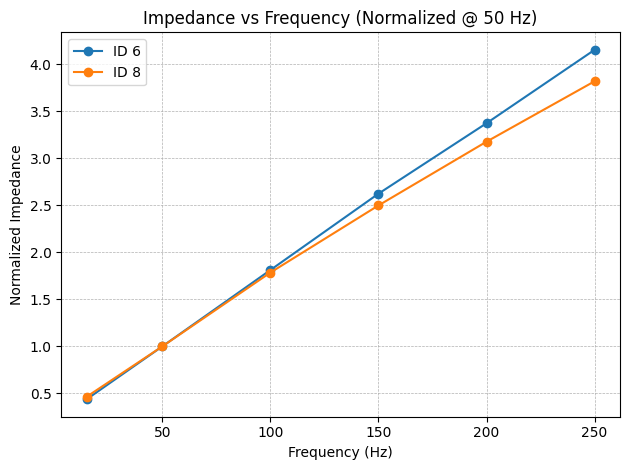

In [6]:
from groundmeas.plots import plot_imp_over_f

plot_imp_over_f([mid[5], mid[7]], normalize_freq_hz=50);